In [38]:
from IPython.core.display import display, HTML
# 노트북 컨테이너 크기 조절
display(HTML("<style>#notebook-container {width: 90% !important; }</style>"))
# 마크다운 폰트
display(HTML("<style>.rendered_html{font-family: 'D2Coding'; font-size: 16pt; line-height: 140%;}</style>"))
# DataFrame 테이블 폰트
display(HTML("<style>.rendered_html table{font-family: 'D2Coding'; font-size: 16pt; line-height: 140%;}</style>"))
# 출력창 폰트
display(HTML("<style>pre{font-family: 'D2Coding', font-size: 16pt;}.rendered_html>ul>li{margin: 10px}</style>"))
display(HTML("<style>div.output_area>pre, div.output_subarea>pre{font-size: 16pt !important; line-height: 140%;}</style>"))
# 코드셀 폰트
display(HTML("<style> .CodeMirror pre {font-family: 'D2Coding'; font-size: 18pt !important; line-height: 140%;}</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree (분류)

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer['target_names'] # ['malignant', 'benign'] > 0 : malignant(악성), 1 : benign(양성)

array(['malignant', 'benign'], dtype='<U9')

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'],
                                                     stratify=cancer['target'], random_state=0)
# stratify : 층화 분리 > 분리 전과 후의 범주별 비율을 최대한 비슷하기 맞춤

In [5]:
from sklearn.tree import DecisionTreeClassifier # 분류모델
model = DecisionTreeClassifier(random_state=0).fit(x_train, y_train) # 학습에 사용되는 특성 순서
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9020979020979021)

In [6]:
# Tree 계열 : 특성 중요도 조회
model.feature_importances_ # 각 특성별 중요도 (%)
fi = pd.Series(model.feature_importances_, index=cancer['feature_names']) # 특성의 이름을 index
fi[fi!=0].sort_values(ascending=False)

worst perimeter            0.725341
worst concave points       0.105163
worst texture              0.037108
worst radius               0.036872
mean texture               0.028312
worst smoothness           0.014335
radius error               0.012235
mean symmetry              0.011018
area error                 0.009993
worst fractal dimension    0.008920
concave points error       0.006690
worst concavity            0.004014
dtype: float64

In [7]:
dt3 = DecisionTreeClassifier(max_depth=3, random_state=0).fit(x_train, y_train) # 최대 깊이를 3으로 설정
dt3.score(x_train, y_train), dt3.score(x_test, y_test)

(0.9765258215962441, 0.916083916083916)

In [8]:
dt5 = DecisionTreeClassifier(max_depth=5, random_state=0).fit(x_train, y_train) # 최대 깊이를 3으로 설정
dt5.score(x_train, y_train), dt5.score(x_test, y_test)

(1.0, 0.9020979020979021)

In [9]:
# 트리 시각화
from sklearn.tree import export_graphviz
export_graphviz(
    dt3, # 시각화 할 모델 지정
    out_file = 'dt3.dot', # 저장할 파일
    feature_names = cancer['feature_names'], # 컬럼명
    class_names = cancer['target_names'],    # 레이블명(범주명)
    impurity=True, # 불순도 출력 유무
    filled=True,   # 색상 설정 유무 
)

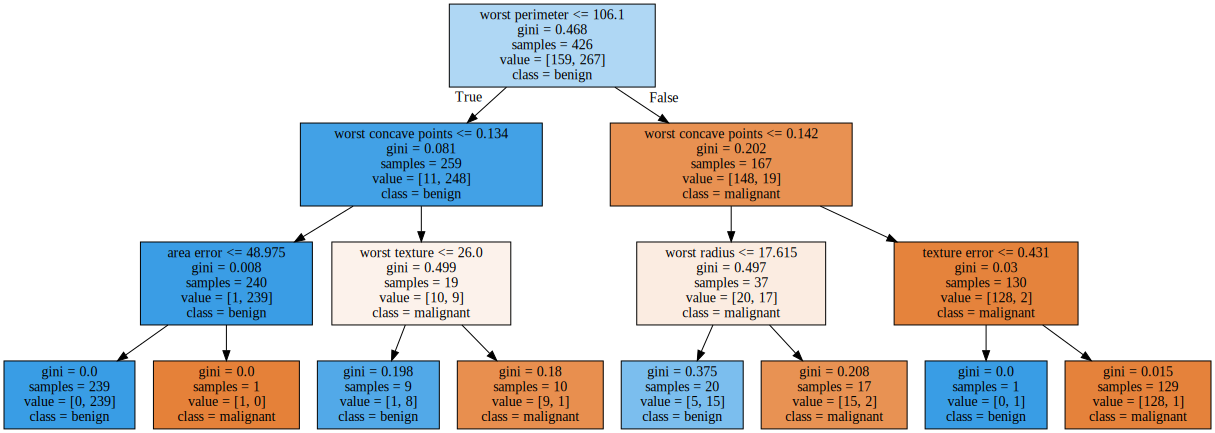

In [10]:
import graphviz 
with open('dt3.dot') as f: # dt3.dot 파일을 열어서 f에 저장
    data = f.read() # f에 있는 값을 data에 읽어옴
graphviz.Source(data).render('dt3.pdf') # pdf 타입으로 저장
graphviz.Source(data)

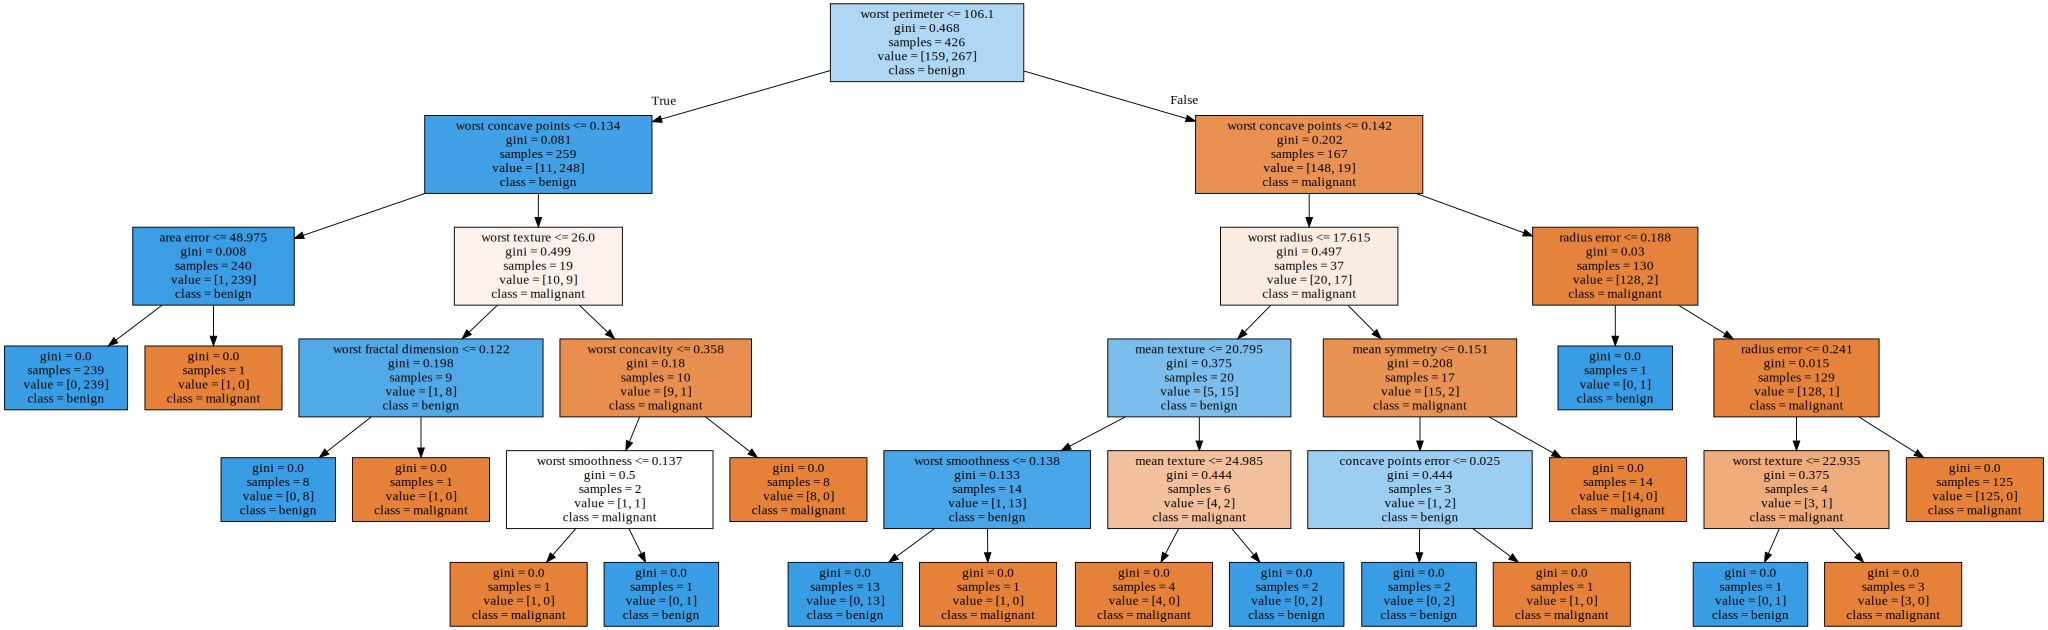

In [11]:
export_graphviz(
    dt5, # 시각화 할 모델 지정
    out_file = 'dt5.dot', # 저장할 파일
    feature_names = cancer['feature_names'], # 컬럼명
    class_names = cancer['target_names'],    # 레이블명(범주명)
    impurity=True, # 불순도 출력 유무
    filled=True,   # 색상 설정 유무 
)
import graphviz 
with open('dt5.dot') as f: # dt5.dot 파일을 열어서 f에 저장
    data = f.read() # f에 있는 값을 data에 읽어옴
graphviz.Source(data)

# Decision Tree (회귀)

In [14]:
# 1) 데이터 불러오기
df = pd.read_csv('boston.csv') 
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [17]:
df.columns.to_list()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'PRICE']

In [19]:
# 2) 데이터 분할하기
features = [
     'CRIM',
     'ZN',
     'INDUS',
     'CHAS',
     'NOX',
     'RM',
     'AGE',
     'DIS',
#      'RAD',
     'TAX',
     'PTRATIO',
     'B',
     'LSTAT',
] # 특성으로 사용할 컬럼명의 목록
X = df[features]
Y = df['PRICE']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [21]:
# 3) 모델 생성, 학습, 분류
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.6463743658741377)

In [22]:
# metrics : 평가 함수들이 모여있는 위치 
# 평가함수들은 실제값, 예측값 순서로 대입
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train, model.predict(x_train)), mean_absolute_error(y_test, model.predict(x_test))

(0.0, 3.392125984251968)

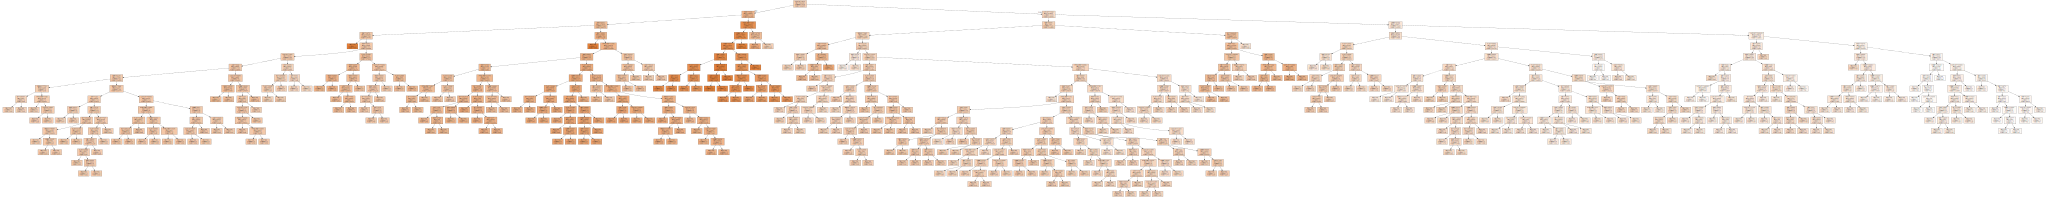

In [23]:
export_graphviz(
    model, # 시각화 할 모델 지정
    out_file = 'model.dot', # 저장할 파일
    feature_names = features, # 컬럼명
    impurity=True, # 불순도 출력 유무
    filled=True,   # 색상 설정 유무 
)
import graphviz 
with open('model.dot') as f: # dt5.dot 파일을 열어서 f에 저장
    data = f.read() # f에 있는 값을 data에 읽어옴
graphviz.Source(data)

# Ensemble (Bagging)
- 데이터 중 일부를 랜덤하게 샘플링 후 샘플링된 데이터로 각각의 DT를 학습시켜 사용하는 방법

In [26]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000).fit(x_train, y_train) # n_estimators : DT 개수
mean_absolute_error(y_train, rfr.predict(x_train)), mean_absolute_error(y_test, rfr.predict(x_test))

(0.7968915567282345, 2.5162385826771767)

# Ensemble (Boosting)

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=1000).fit(x_train, y_train) # n_estimators : DT 개수
mean_absolute_error(y_train, gbr.predict(x_train)), mean_absolute_error(y_test, gbr.predict(x_test))

(0.03003171544932823, 2.533647372906892)

- DT : (0.0, 3.392125984251968)
- RF : (0.8026121372031659, 2.5674409448818913)
- GB : (0.03003171544932823, 2.533647372906892)

In [ ]:
!pip install lightgbm
!pip instlal xgboost

In [30]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
model = XGBRegressor().fit(x_train, y_train) # n_estimators : DT 개수
mean_absolute_error(y_train, model.predict(x_train)), mean_absolute_error(y_test, model.predict(x_test))

(0.008036799669894904, 2.7457284491831864)

In [35]:
from sklearn.model_selection import GridSearchCV

model = XGBRegressor(n_jobs=1)

params = {
    'n_estimators' : [250, 500, 750],
    'learning_rate' : [1, 0.1, 0.01],
#     'subsample' : [0.5, 0.6, 0.7]
#     'colsample_bytree'
#     'reg_alpha'
#     'reg_lambda'
}
gs = GridSearchCV(model, params, n_jobs=1).fit(x_train, y_train) # Elice 환경에선 n_jobs=1 설정 

In [37]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.090835,0.004190,0.002873,0.000425,1,250,"{'learning_rate': 1, 'n_estimators': 250}",0.784167,0.490709,0.804693,0.870243,0.826280,0.755218,0.135301,7
1,0.141572,0.002681,0.002712,0.000210,1,500,"{'learning_rate': 1, 'n_estimators': 500}",0.784167,0.490709,0.804693,0.870243,0.826280,0.755218,0.135301,7
2,0.190999,0.001707,0.002868,0.000198,1,750,"{'learning_rate': 1, 'n_estimators': 750}",0.784167,0.490709,0.804693,0.870243,0.826280,0.755218,0.135301,7
3,0.260577,0.007236,0.003248,0.000397,0.1,250,"{'learning_rate': 0.1, 'n_estimators': 250}",0.921010,0.756681,0.925763,0.856048,0.916138,0.875128,0.064412,1
4,0.434513,0.007343,0.003560,0.000245,0.1,500,"{'learning_rate': 0.1, 'n_estimators': 500}",0.920955,0.756702,0.925757,0.856066,0.916092,0.875114,0.064389,3
5,0.491767,0.012682,0.004065,0.000052,0.1,750,"{'learning_rate': 0.1, 'n_estimators': 750}",0.920955,0.756702,0.925757,0.856066,0.916092,0.875114,0.064389,2
6,0.215488,0.003136,0.003077,0.000208,0.01,250,"{'learning_rate': 0.01, 'n_estimators': 250}",0.870655,0.629814,0.884058,0.725815,0.815840,0.785236,0.095588,6
7,0.464129,0.006615,0.003641,0.000258,0.01,500,"{'learning_rate': 0.01, 'n_estimators': 500}",0.924443,0.728664,0.936704,0.844811,0.908625,0.868649,0.076820,5
8,0.715719,0.012632,0.004448,0.000346,0.01,750,"{'learning_rate': 0.01, 'n_estimators': 750}",0.925578,0.733162,0.934063,0.851408,0.912791,0.871400,0.074946,4


In [43]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
X = df.iloc[:, [1, 2]]
X

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
145,3.0,5.2
146,2.5,5.0
147,3.0,5.2
148,3.4,5.4


In [44]:
from sklearn.cluster import KMeans
K = KMeans(n_clusters=3).fit(X) # 군집 수는 3개로 설정

In [47]:
# fit 과정에서 사용한 데이터에 대한 군집 번호는 labels_ 속성으로 확인
X['Cluster'] = K.labels_
X

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sepal width (cm),petal length (cm),Cluster
0,3.5,1.4,0
1,3.0,1.4,0
2,3.2,1.3,0
3,3.1,1.5,0
4,3.6,1.4,0
...,...,...,...
145,3.0,5.2,1
146,2.5,5.0,2
147,3.0,5.2,1
148,3.4,5.4,1


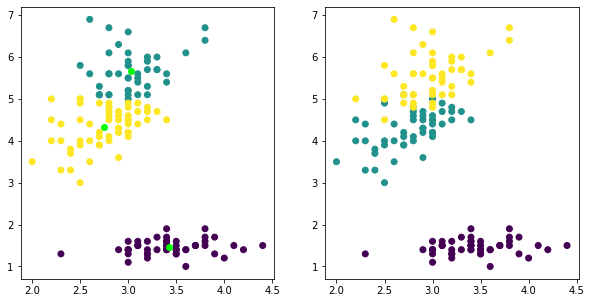

In [52]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X['sepal width (cm)'], X['petal length (cm)'], c=X['Cluster']) # 똑같은 값별로 같은 색상을 부여
center = K.cluster_centers_
plt.scatter(center[:,0], center[:,1], c='#00ff00') # 각 군집의 중심점

plt.subplot(1, 2, 2)
plt.scatter(X['sepal width (cm)'], X['petal length (cm)'], c=iris['target'])